# Import Basic Library & Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for showing graph without calling plt.show()
%matplotlib inline 

In [2]:
df = pd.read_csv('data/daily Charleston 1921-2014.csv', parse_dates=['time'])
df.head(3)

,time,depth,latitude,longitude,sea_surface_height_above_reference_level,sensor_type_code
0,UTC,m,degrees_north,degrees_east,millimeters,NaN
1,1921-01-01T12:00:00Z,0.0,32.782,-79.925,NaN,NaN
2,1921-01-02T12:00:00Z,0.0,32.782,-79.925,NaN,NaN


# Exploratory Data Analysis

In [3]:
df.drop([0], inplace=True)
df.drop(columns=['depth', 'latitude', 'longitude', 'sensor_type_code'], inplace=True)
df.head(3)

,time,sea_surface_height_above_reference_level
1,1921-01-01T12:00:00Z,NaN
2,1921-01-02T12:00:00Z,NaN
3,1921-01-03T12:00:00Z,NaN


In [4]:
df['time'] = pd.to_datetime(df['time'])
df['sea_surface_height_above_reference_level'] = pd.to_numeric(df['sea_surface_height_above_reference_level'])
df.dtypes

time                                        datetime64[ns, UTC]
sea_surface_height_above_reference_level                float64
dtype: object

In [6]:
df.describe()

,sea_surface_height_above_reference_level
count,33529.000000
mean,1652.943273
std,173.129421
min,846.000000
25%,1533.000000
50%,1648.000000
75%,1769.000000
max,2498.000000


In [7]:
df_notna = pd.DataFrame(df.notna().sum()).rename(columns={0:'notna'}).reset_index()
df_isna = pd.DataFrame(df.isna().sum()).rename(columns={0:'isna'}).reset_index()
df_isna_perc = df_notna.merge(df_isna, on='index', how='inner')
df_isna_perc['isna_percentage'] = df_isna_perc['isna']/(df_isna_perc['isna']+df_isna_perc['notna'])*100
df_isna_perc.sort_values('isna_percentage',ascending=False).head()

,index,notna,isna,isna_percentage
1,sea_surface_height_above_reference_level,33529,804,2.34177
0,time,34333,0,0.00000


C:\Users\user\Miniconda3\envs\jcop\lib\site-packages\seaborn\relational.py:792: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  x, y = np.asarray(x), np.asarray(y)
C:\Users\user\Miniconda3\envs\jcop\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Total Sea level rise in a century: 297.52 mm


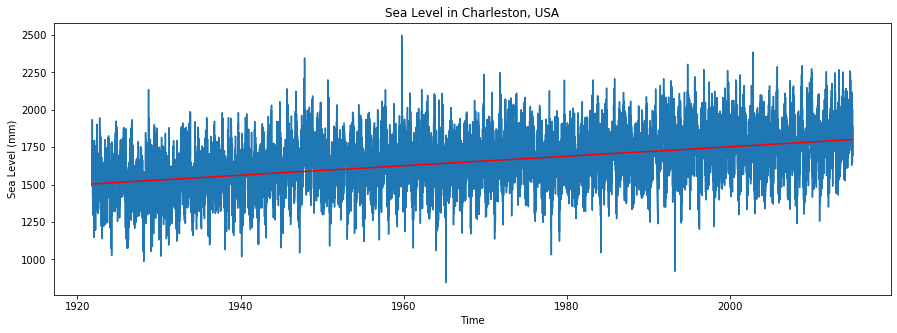

In [8]:
df_plot = df.dropna()

plt.figure(figsize=(15, 5))
# plot sea level dataset
sns.lineplot(x='time', y='sea_surface_height_above_reference_level', data=df_plot)

# plot trendline
x = range(0, len(df_plot))
z = np.polyfit(x, y=df_plot['sea_surface_height_above_reference_level'], deg=1) # have to be clean from missing data
p = np.poly1d(z)
plt.plot(df_plot['time'], p(x), c="r", ls='-')

plt.title('Sea Level in Charleston, USA')
plt.xlabel('Time')
plt.ylabel('Sea Level (mm)')
print(f'Total Sea level rise in a century: {round(p(len(df_plot)) - p(0), 2)} mm')

In [9]:
df_plot['year'] = df_plot['time'].dt.year

C:\Users\user\Miniconda3\envs\jcop\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Sea level rise in 20 years: 76.99 mm


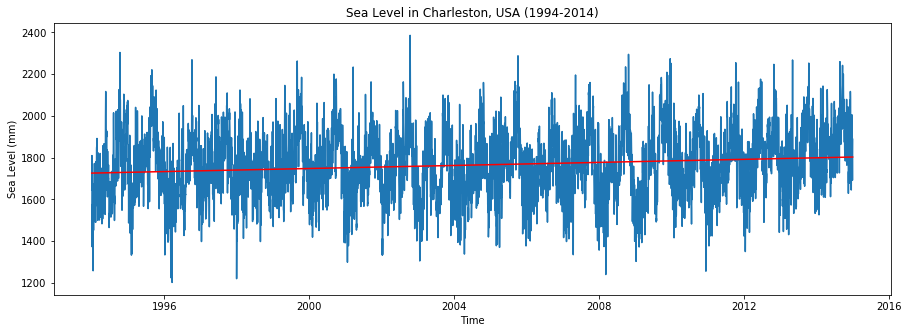

In [24]:
df_plot_20y = df_plot[df_plot['year'] > 1993]

plt.figure(figsize=(15, 5))
# plot sea level dataset
sns.lineplot(x='time', y='sea_surface_height_above_reference_level', data=df_plot_20y)

# plot trendline
x = range(0, len(df_plot_20y))
z = np.polyfit(x, y=df_plot_20y['sea_surface_height_above_reference_level'], deg=1) # have to be clean from missing data
p = np.poly1d(z)
plt.plot(df_plot_20y['time'], p(x), c="r", ls='-')

plt.title('Sea Level in Charleston, USA (1994-2014)')
plt.xlabel('Time')
plt.ylabel('Sea Level (mm)')
print(f'Sea level rise in 20 years: {round(p(len(df_plot_20y)) - p(0), 2)} mm')

Sea level rise in a year: 187.34 mm


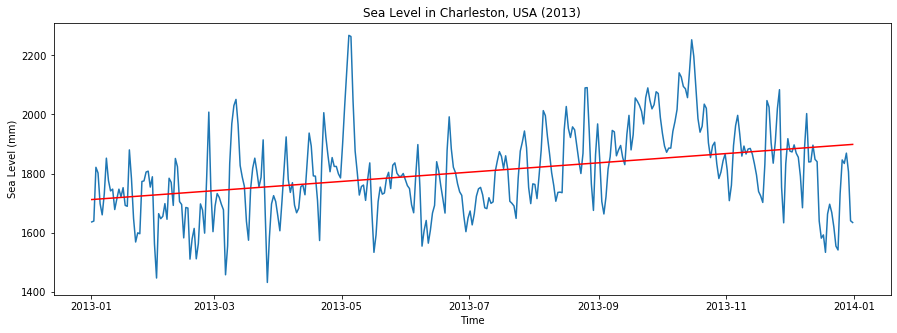

In [26]:
df_plot_1y = df_plot[df_plot['year'] == 2013]

plt.figure(figsize=(15, 5))
# plot sea level dataset
sns.lineplot(x='time', y='sea_surface_height_above_reference_level', data=df_plot_1y)

# plot trendline
x = range(0, len(df_plot_1y))
z = np.polyfit(x, y=df_plot_1y['sea_surface_height_above_reference_level'], deg=1) # have to be clean from missing data
p = np.poly1d(z)
plt.plot(df_plot_1y['time'], p(x), c="r", ls='-')

plt.title('Sea Level in Charleston, USA (2013)')
plt.xlabel('Time')
plt.ylabel('Sea Level (mm)')
print(f'Sea level rise in a year: {round(p(len(df_plot_1y)) - p(0), 2)} mm')

## Change per 20 years

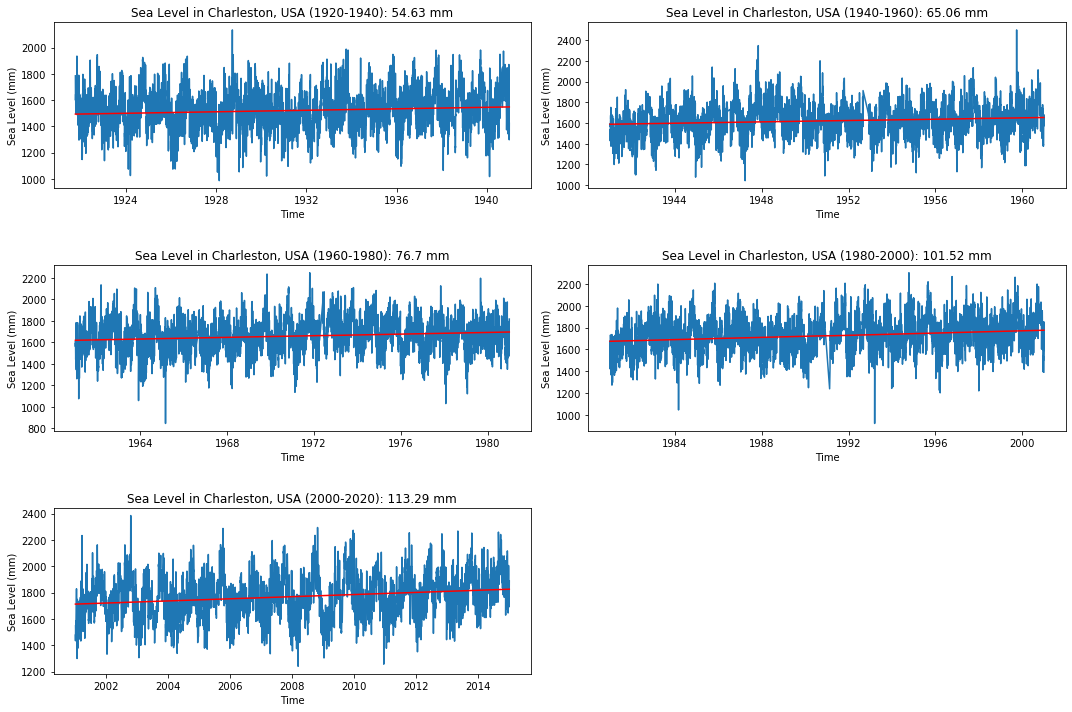

In [12]:
rows, cols = 3, 2
plt.figure(figsize=(rows*5, cols*5))
for i in range(5):
    df_per20 = df_plot[(df_plot['year'] > (1920 + i*20)) & (df_plot['year'] <= (1940 + i*20))]
    plt.subplot(3, 2, i+1)
    # plot sea level dataset
    sns.lineplot(x='time', y='sea_surface_height_above_reference_level', 
                 data=df_per20)

    # plot trendline
    x = range(0, len(df_per20))
    z = np.polyfit(x, y=df_per20['sea_surface_height_above_reference_level'], deg=1) # have to be clean from missing data
    p = np.poly1d(z)
    plt.plot(df_per20['time'], p(x), c="r", ls='-')

    plt.title(f'Sea Level in Charleston, USA ({1920 + i*20}-{1940 + i*20}): {round(p(len(df_per20)) - p(0), 2)} mm')
    plt.xlabel('Time')
    plt.ylabel('Sea Level (mm)')
    
plt.tight_layout(h_pad = 3)

Kesamaan dari perubahan per 20 tahun hanya pada trend nya yang terus naik, sementara untuk besar perubahannya harus melihat kejadian dan kondisi iklim pada waktu yang bersangkutan.

# Treatment Missing Values

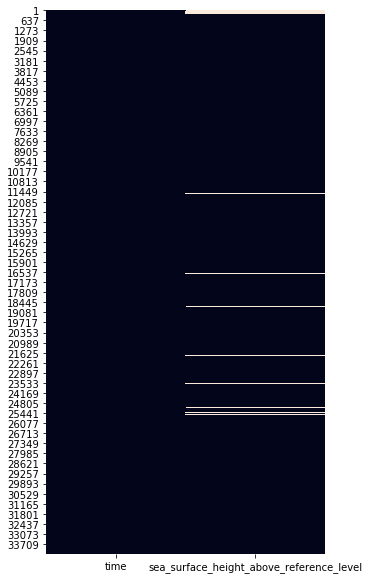

In [23]:
# check missing value location in the data
plt.figure(figsize=(5, 10))

_ = sns.heatmap(df.isnull(), cbar=False)

Banyak ditemukan missing value pada awal dataset serta di tengah-tengah dataset, untuk missing value di bagian awal dapat dibuang seluruhnya, sedangkan treatment missing value di tengah dataset perlu diinspeksi satu per satu

### Missing value di index 11000 - 12000

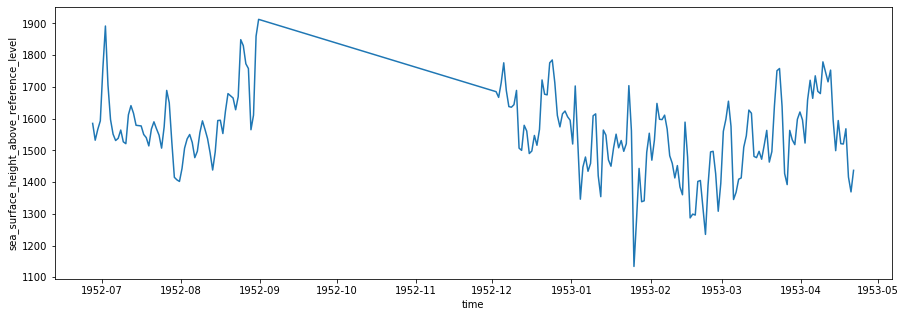

In [30]:
df11_12 = df[(df.index > 11500) & (df.index < 11800)]

plt.figure(figsize=(15, 5))
# plot sea level dataset
sns.lineplot(x='time', y='sea_surface_height_above_reference_level', data=df11_12)

### Missing value di index 16000 - 17000

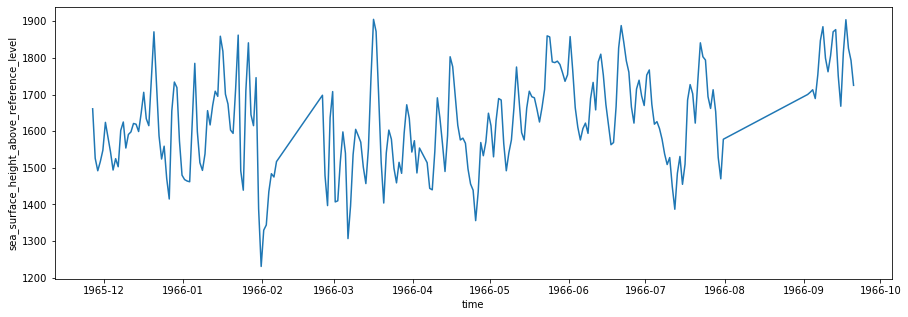

In [28]:
df16_17 = df[(df.index > 16400) & (df.index < 16700)]

plt.figure(figsize=(15, 5))
# plot sea level dataset
sns.lineplot(x='time', y='sea_surface_height_above_reference_level', data=df16_17)

### Missing value di index 18000 - 19000

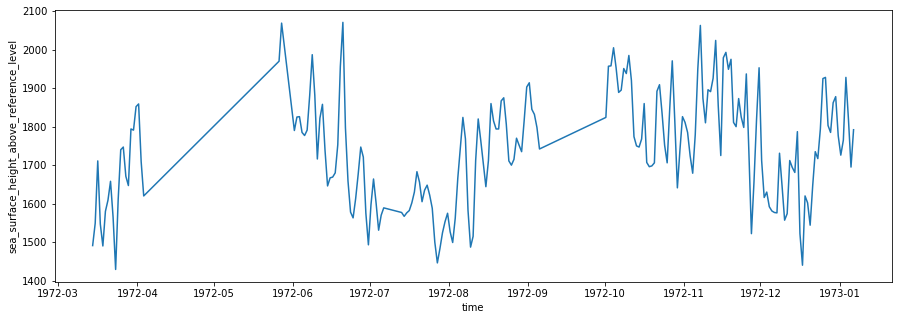

In [29]:
df18_19 = df[(df.index > 18700) & (df.index < 19000)]

plt.figure(figsize=(15, 5))
# plot sea level dataset
sns.lineplot(x='time', y='sea_surface_height_above_reference_level', data=df18_19)

### Missing value di index 25000 - 26000

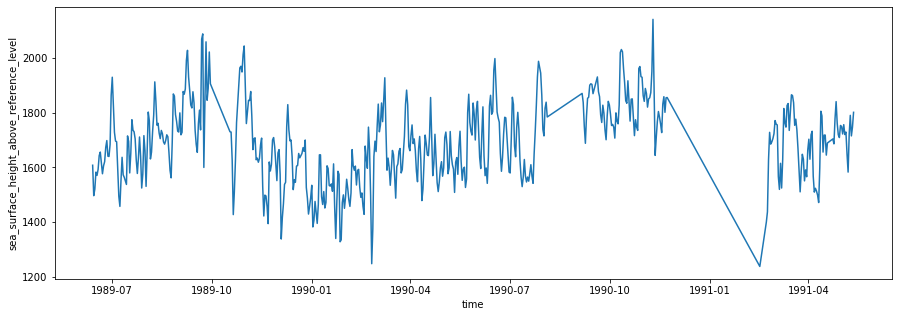

In [31]:
df25_26 = df[(df.index > 25000) & (df.index < 25700)]

plt.figure(figsize=(15, 5))
# plot sea level dataset
sns.lineplot(x='time', y='sea_surface_height_above_reference_level', data=df25_26)

Berdasarkan inspeksi yang sudah dilakukan, missing value di tahun 1952, 1972, dan 1991 jumlahnya cukup besar. Perlu diketahui bahwa fenomena tinggi muka air laut (pasang surut) dipengaruhi oleh gaya tarik bulan dan matahari serta benda-benda langit lain, dan menyebabkan pola sinusoidal yang dapat dilihat pada plot 20 tahunan tinggi muka air laut yang sudah saya buat di atas. Hal ini membuat data-data yang hilang di tengah dapat dengan mudah diinterpolasi. Tetapi ketika missing datanya terlalu banyak, maka polanya akan berubah dan menyebabkan beberapa nilai menjadi kurang valid. Selain itu, model tidak memperhitungkan fenomena fisis yang telah saya jabarkan di atas dan membuat prediksi berdasarkan pola yang dibentuk oleh data. Oleh karena itu diputuskan untuk membuang data sebelum tahun 1991.

In [74]:
df['year'] = df['time'].dt.year
df_m91 = df[df['year'] > 1990]
df_m91.head(3)

,time,sea_surface_height_above_reference_level,year
25568,1991-01-01 12:00:00+00:00,NaN,1991
25569,1991-01-02 12:00:00+00:00,NaN,1991
25570,1991-01-03 12:00:00+00:00,NaN,1991


In [76]:
# check starting point of non-NaN value
df_m91[df_m91['sea_surface_height_above_reference_level'].notna()].head(3)

,time,sea_surface_height_above_reference_level,year
25613,1991-02-15 12:00:00+00:00,1239.0,1991
25619,1991-02-21 12:00:00+00:00,1401.0,1991
25620,1991-02-22 12:00:00+00:00,1438.0,1991


In [77]:
# drop missing values at the beggining of the data
df_m91 = df_m91.drop(df.index[25568:25618]).reset_index()
df_m91 = df_m91.drop([0], axis=0).reset_index()
df_m91.drop(columns=['index', 'level_0', 'year'], inplace=True)
df_m91.head()

,time,sea_surface_height_above_reference_level
0,1991-02-21 12:00:00+00:00,1401.0
1,1991-02-22 12:00:00+00:00,1438.0
2,1991-02-23 12:00:00+00:00,1628.0
3,1991-02-24 12:00:00+00:00,1728.0
4,1991-02-25 12:00:00+00:00,1685.0


In [70]:
df_notna = pd.DataFrame(df_m91.notna().sum()).rename(columns={0:'notna'}).reset_index()
df_isna = pd.DataFrame(df_m91.isna().sum()).rename(columns={0:'isna'}).reset_index()
df_isna_perc = df_notna.merge(df_isna, on='index', how='inner')
df_isna_perc['isna_percentage'] = df_isna_perc['isna']/(df_isna_perc['isna']+df_isna_perc['notna'])*100
df_isna_perc.sort_values('isna_percentage',ascending=False).head()

,index,notna,isna,isna_percentage
1,sea_surface_height_above_reference_level,8705,10,0.114745
0,time,8715,0,0.000000


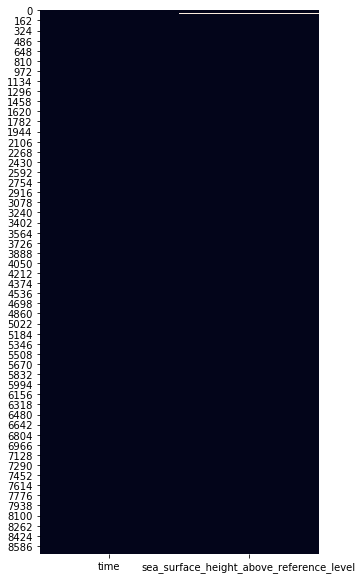

In [78]:
# check missing value location in the data
plt.figure(figsize=(5, 10))

_ = sns.heatmap(df_m91.isnull(), cbar=False)

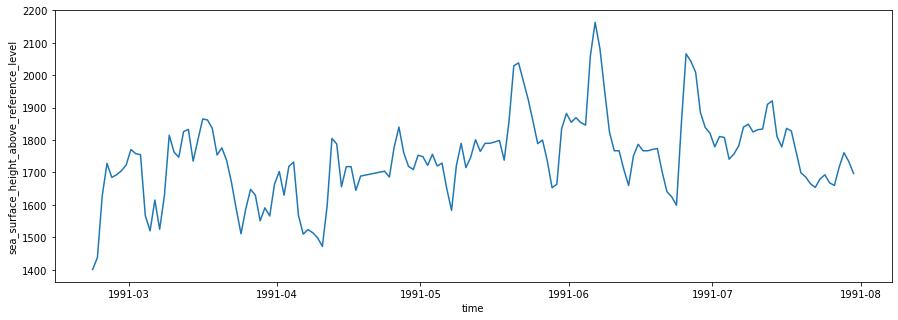

In [79]:
df_na_m91 = df_m91[(df_m91.index < 160)]

plt.figure(figsize=(15, 5))
# plot sea level dataset
sns.lineplot(x='time', y='sea_surface_height_above_reference_level', data=df_na_m91)

Dari hasil inspeksi data di tahun 1991, ada 10 data kosong. Data kosong ini menurut saya bisa diisi menggunakan interpolasi karena jika dilihat dari hasil plotnya nilai data kosong tidak terlihat jelas.

In [81]:
df_try = df_m91.copy()
df_try['sea_surface_height_above_reference_level'] = df_try['sea_surface_height_above_reference_level'].interpolate()

In [82]:
df_use = df_try.set_index('time')
df_use.index = pd.to_datetime(df_use.index)
df_use.rename(columns={'sea_surface_height_above_reference_level': 'sea_level'}, inplace=True)
df_use.head(2)

,sea_level
time,
1991-02-21 12:00:00+00:00,1401.0
1991-02-22 12:00:00+00:00,1438.0
